In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('darkgrid')
mpl.rcParams['figure.figsize'] = [12,8]

### What is SVM?
- Linear classifiers (so far)
- Trained using the hinge loss and L2 regularization
- Support vector: a training example **not** in the flat part of the loss diagram
- Support vector: an example that in incorrectly classified **or** close to the boundary 
- If an example is not a support vector, removing it has no effect on the model
- Having a small number of supprot vectors makes kernel SVMs really fast

### Max-margin viewpoint
- The SVM maximizes the 'margin' for linearly separable datasets
- Margin: distance from the boundary to the closest points 

In [3]:
from sklearn.datasets import load_wine
X = load_wine().data
y = load_wine().target
X = X[:, :2]

In [4]:
from sklearn.svm import SVC
import dc_func as dc

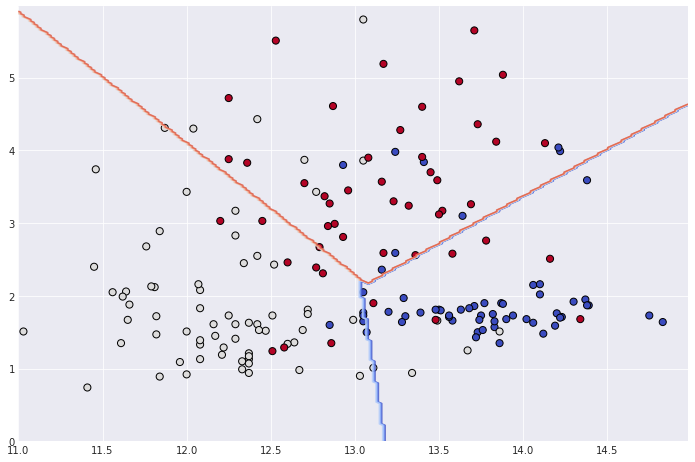

In [5]:
# Train a linear SVM
svm = SVC(kernel='linear')
svm.fit(X, y)
dc.plot_classifier(X, y, svm, lims=(11,15,0,6))

In [6]:
# Make a new data set keeping only the support vectors
print("Number of original examples", len(X))
print("Number of support vectors", len(svm.support_))
X_small = X[svm.support_]
y_small = y[svm.support_]

Number of original examples 178
Number of support vectors 81


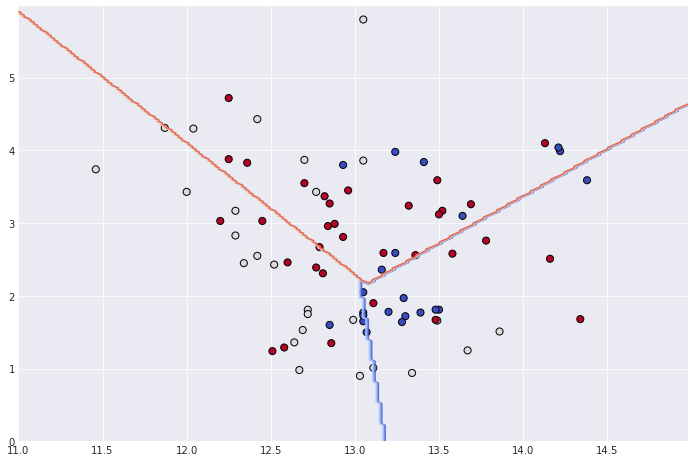

In [7]:
# Train a new SVM using only the support vectors
svm_small = SVC(kernel="linear")
svm_small.fit(X_small, y_small)
dc.plot_classifier(X_small, y_small, svm_small, lims=(11,15,0,6))

In [8]:
from sklearn import datasets
digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.5)

In [9]:
X_train.shape
# y_train[y_train != 2] = 0
# y_train[y_train == 2] = 1
# y_train
# X_train

(898, 64)

In [10]:
from sklearn.model_selection import GridSearchCV

# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

Best CV params {'gamma': 0.001}


In [13]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'C': 10, 'gamma': 0.001}
Best CV accuracy 0.9855233853006682
Test accuracy of best grid search hypers: 0.9899888765294772


### Comparing logistic digression and SVM
- Logistic regression:
    - Is a linear classifier
    - Can use with kernels, but slow 
    - Outputs meaningful probababilities
    - Can be extended to multiclass
    - All data points affect fit
    - L2 or L1 regularization
    
- Support vector machines
   - Is a linear classifier
   - Can use with kernels, and fast
   - Does not naturally output probabilities
   - Can be extended to multiclass
   - Only "support vectors" affect fit
   - Conventionally just L2 regularization
   
#### Use in scikit-learn
- Logistic regression in sklearn:
    - `linear_model.LogisticRegression`
- Key hyperparameters in sklearn:
    - `C` (inverse regularization strength)
    - `penalty` (type of regularization)
    - `multi-class` (type of multi-class)
    
- SVM in sklearn: 
    - `svm.LinearSVC` and `svm.SVC`
- Key hyperparameters in sklearn:
    - `C` (inverse regularization strength)
    - `kernel` (type of kernel)
    - `gamma` (inverse RBF smoothness)
   
#### SGDC classifier
- `SGDClassifier`: scales well to large datasets

```python
from sklearn.linear_model import SGDClassifier

logreg = SGDClassifier(loss='log')

linsvm = SGDClassifier(loss='hinge')
```
- `SGDClassifier` hyperparameter `alpha` is like `1/C`

In [14]:
from sklearn.linear_model import SGDClassifier

In [16]:
# We set random_state=0 for reproducibility 
linear_classifier = SGDClassifier(random_state=0)

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge', 'log'], 'penalty':['l1','l2']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'alpha': 0.1, 'loss': 'log', 'penalty': 'l2'}
Best CV accuracy 0.9532293986636972
Test accuracy of best grid search hypers: 0.9510567296996663
